<a href="https://colab.research.google.com/github/saida1997/ETE-456/blob/main/1608014_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring different types of Classification Algorithms**
Course No: ETE 456

Name: Saida Sharmin

 ID: 1608014

**Objective**

> 1.To apply different classification algorithms in real world dataset.

#Task

> Prediction of Stroke patient


In [1]:
import warnings
warnings.filterwarnings("ignore")

#Importing libraries

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 

#Dataset

In [3]:
# Download the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

--2021-12-20 14:01:14--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv [following]
--2021-12-20 14:01:14--  https://www.dropbox.com/s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9755ff9d4bbcc618b8e2e7f67f.dl.dropboxusercontent.com/cd/0/inline/BcNV8ukOEPl3hTwd0I-Zz7TfeSalcgGXe-LROnN0R-YaShJVmrOWNZtu7pRph52wf9hx2xWH8Vwxq9JJAfb5oITyGeCfkjjJpaFkTHDCLqg3oxS5nZo0XrD1ZlyGVSwUY9iPTLx7NpESmGo7RETz69Gd/file# [following]
--2021-12-20 14:01:14--  https://uc9755ff9d4bbcc618b8e2e7f67f.dl.dropboxusercontent.com/cd/0/inline/BcNV8ukOEPl3hTwd0I-

#Importing the dataset

In [4]:


dataset = pd.read_csv('stroke-data.csv')
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Exploratory Data Analysis

> For exploratory data analysis Klib is used here in the dataset. From this the correlation between features and target also the intercorrelation of the features can be known. Here the features used are only those which have numerical data.



In [5]:
! pip install klib

In [6]:
import klib

In [7]:
klib.corr_mat(dataset) # returns a color-encoded correlation matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


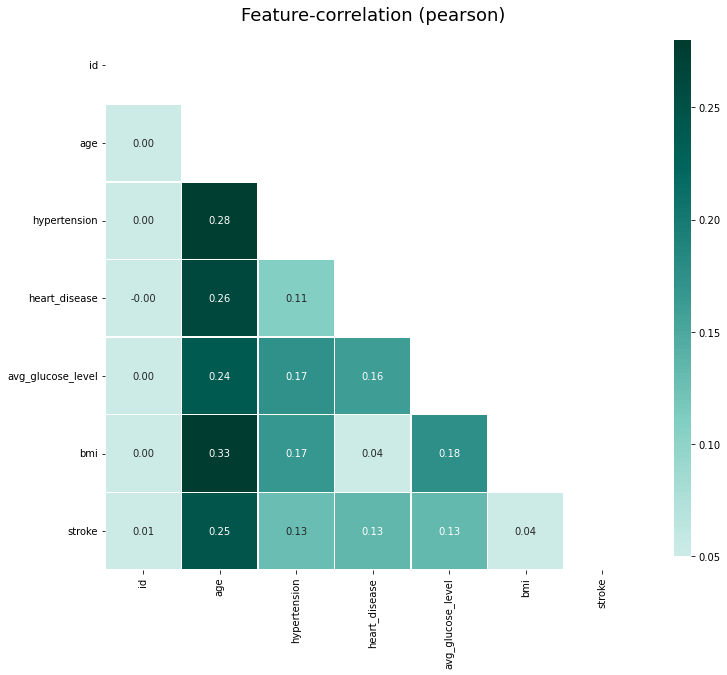

In [8]:
klib.corr_plot(dataset)

#Splitting data into dependent and independent variable

In [9]:
features = dataset[['age',	'hypertension',	'heart_disease',	'bmi','Residence_type','avg_glucose_level',	'smoking_status']]  # for independent
target = dataset[['stroke']]   # for dependent

In [10]:
features

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status
0,67.0,0,1,36.6,Urban,228.69,formerly smoked
1,61.0,0,0,NaN,Rural,202.21,never smoked
2,80.0,0,1,32.5,Rural,105.92,never smoked
3,49.0,0,0,34.4,Urban,171.23,smokes
4,79.0,1,0,24.0,Rural,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,NaN,Urban,83.75,never smoked
5106,81.0,0,0,40.0,Urban,125.20,never smoked
5107,35.0,0,0,30.6,Rural,82.99,never smoked
5108,51.0,0,0,25.6,Rural,166.29,formerly smoked


In [11]:
target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


#Taking care of missing data

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(features[['age',	'hypertension',	'heart_disease','bmi','avg_glucose_level']]) 

In [14]:
features[['age',	'hypertension',	'heart_disease','bmi','avg_glucose_level']]= imputer.transform(features[['age',	'hypertension',	'heart_disease','bmi','avg_glucose_level']])

In [15]:
features

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status
0,67.0,0.0,1.0,36.600000,Urban,228.69,formerly smoked
1,61.0,0.0,0.0,28.893237,Rural,202.21,never smoked
2,80.0,0.0,1.0,32.500000,Rural,105.92,never smoked
3,49.0,0.0,0.0,34.400000,Urban,171.23,smokes
4,79.0,1.0,0.0,24.000000,Rural,174.12,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,28.893237,Urban,83.75,never smoked
5106,81.0,0.0,0.0,40.000000,Urban,125.20,never smoked
5107,35.0,0.0,0.0,30.600000,Rural,82.99,never smoked
5108,51.0,0.0,0.0,25.600000,Rural,166.29,formerly smoked


In [16]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(target[['stroke']])

In [17]:
target[['stroke']]= imputer.transform(target[['stroke']])

In [18]:
target

,stroke
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
5105,0.0
5106,0.0
5107,0.0
5108,0.0


#Encoding Categorical Data using One Hot Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [23]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(features[['Residence_type','smoking_status']]))

In [24]:
encoded_labels.columns = encoder.get_feature_names(['Residence_type','smoking_status'])
dataset= pd.concat([features, encoded_labels ], axis=1)

In [25]:
dataset

,age,hypertension,heart_disease,bmi,Residence_type,avg_glucose_level,smoking_status,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,36.600000,Urban,228.69,formerly smoked,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,28.893237,Rural,202.21,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,32.500000,Rural,105.92,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,34.400000,Urban,171.23,smokes,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,24.000000,Rural,174.12,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,28.893237,Urban,83.75,never smoked,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0.0,0.0,40.000000,Urban,125.20,never smoked,0.0,1.0,0.0,0.0,1.0,0.0
5107,35.0,0.0,0.0,30.600000,Rural,82.99,never smoked,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0.0,0.0,25.600000,Rural,166.29,formerly smoked,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
dataset.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'Residence_type',
       'avg_glucose_level', 'smoking_status', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [27]:
new_features = dataset[['age', 'hypertension', 'heart_disease', 'bmi',
       'avg_glucose_level','Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]

#Splitting dataset into train and test set

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(new_features,target,test_size=0.3,random_state=0)

In [29]:
print(X_train.shape)
print(X_test.shape)

(3577, 11)
(1533, 11)


In [30]:
X_test

,age,hypertension,heart_disease,bmi,avg_glucose_level,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
42,82.0,0.0,1.0,26.4,144.90,0.0,1.0,0.0,0.0,0.0,1.0
380,4.0,0.0,0.0,16.7,106.22,1.0,0.0,1.0,0.0,0.0,0.0
3524,58.0,0.0,0.0,25.9,79.95,0.0,1.0,0.0,0.0,1.0,0.0
352,20.0,0.0,0.0,34.1,96.57,1.0,0.0,0.0,0.0,1.0,0.0
4927,10.0,0.0,0.0,13.7,69.84,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
929,75.0,0.0,1.0,30.5,207.64,0.0,1.0,0.0,1.0,0.0,0.0
2629,45.0,0.0,0.0,45.3,172.33,0.0,1.0,0.0,1.0,0.0,0.0
663,38.0,0.0,0.0,24.3,98.73,1.0,0.0,0.0,0.0,1.0,0.0
2303,75.0,0.0,0.0,33.4,219.39,1.0,0.0,0.0,0.0,0.0,1.0


#Different types of Classification Algorithm

1. Logistic Regression
2. K Nearest Neighbor (KNN) 
3. Decision Tree Classifier
4. Random Forest Classifier
5.  Naive Bayes
6. Support Vector Machine (SVM) 

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
# prediction
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [46]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[1316,  141],
       [  46,   30]])

In [35]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1457
         Yes       1.00      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533



**KNN Classifier**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [37]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[1449    8]
 [  74    2]]
              precision    recall  f1-score   support

          No       0.95      0.99      0.97      1457
         Yes       0.20      0.03      0.05        76

    accuracy                           0.95      1533
   macro avg       0.58      0.51      0.51      1533
weighted avg       0.91      0.95      0.93      1533



**Support Vector Machine**

In [38]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [39]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[1457    0]
 [  76    0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1457
         Yes       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



**Decision Tree Classifier**

In [40]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [41]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[1404   53]
 [  63   13]]
              precision    recall  f1-score   support

          No       0.96      0.96      0.96      1457
         Yes       0.20      0.17      0.18        76

    accuracy                           0.92      1533
   macro avg       0.58      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533



**Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)


In [43]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[1452    5]
 [  72    4]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1457
         Yes       0.44      0.05      0.09        76

    accuracy                           0.95      1533
   macro avg       0.70      0.52      0.53      1533
weighted avg       0.93      0.95      0.93      1533



**Naive Bayes**

In [44]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [45]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[1316  141]
 [  46   30]]
              precision    recall  f1-score   support

          No       0.97      0.90      0.93      1457
         Yes       0.18      0.39      0.24        76

    accuracy                           0.88      1533
   macro avg       0.57      0.65      0.59      1533
weighted avg       0.93      0.88      0.90      1533



## Result Analysis

**Logistic Regression**
1. Weighted Average F1-Score   : 93%
2. Accuracy                    : 95%

**KNN Classifier**

1. Weighted Average F1-Score   : 93%
2. Accuracy                    : 95%

**Support Vector Machine**
1. Weighted Average F1-Score   : 93%
2. Accuracy                    : 95%

**Decision Tree Classification**

1. Weighted Average F1-Score   : 92%
2. Accuracy                    : 92%

**Random Forest Classification**
1. Weighted Average F1-Score   : 93%
2. Accuracy                    : 95%

**Naive Bayes**
1. Weighted Average F1-Score   : 90%
2. Accuracy                    : 88%


> Here several classification algorithms has been applied on the dataset of the stroke patient. From the result we can see that, the accuracy and weighted average F1-score is better in logistic regression, KNN classifier, support vector machine and Random Forest Classifier. Here the prediction of Naive Bayes less efficient than others.

